In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
import sys
from os.path import join
import math
import matplotlib.pyplot as plt

sys.path.insert(0, '/'.join(sys.path[0].split('/')[:-1] + ['scripts']))
from loss import *

In [3]:
#export
def fit(num_epochs, data_bunch, model, loss_fn, optimizer):
    accuracies, losses = [], []
    
    for epoch in range(1, num_epochs+1):
        for x_batch, y_batch in data_bunch.train_dl:
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            
            loss_fn.backward()
            model.backward()
            
            optimizer.step()
            optimizer.zero_grad()
            
        count = accuracy = loss = 0
        for x_batch, y_batch in data_bunch.valid_dl:
            pred = model(x_batch)
            accuracy += compute_accuracy(pred, y_batch)
            loss += loss_fn(pred, y_batch)
            count += 1
        accuracy /= count
        loss /= count
        
        accuracies.append(accuracy)
        losses.append(loss)
        print(f'Epoch {epoch}    Accuracy {round(accuracy.item(), 3)}    Loss {round(loss.item(), 3)}')
    
    return accuracies, losses

In [4]:
data_bunch = get_data_bunch(*get_mnist_data(), batch_size=64)
model = get_lin_model(data_bunch)
optimizer = Optimizer(list(model.parameters()), learning_rate=0.1)
loss_fn = CrossEntropy()

In [5]:
accuracies, losses = fit(5, data_bunch, model, loss_fn, optimizer)

Epoch 1    Accuracy 0.954    Loss 0.159
Epoch 2    Accuracy 0.928    Loss 0.222
Epoch 3    Accuracy 0.964    Loss 0.124
Epoch 4    Accuracy 0.96    Loss 0.128
Epoch 5    Accuracy 0.971    Loss 0.098


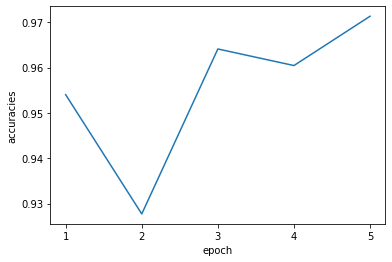

In [6]:
plot(accuracies, 'accuracies')

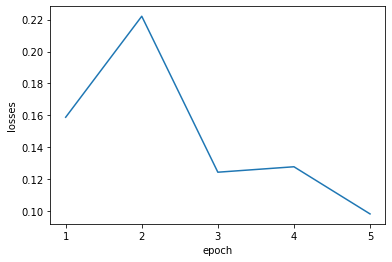

In [7]:
plot(losses, 'losses')